* This project tried to the persistancy and consistancy of automomous driving in United States
</br>

* Source: the 2020 autonomous mileage reports in DMV website: </br> https://www.dmv.ca.gov/portal/vehicle-industry-services/autonomous-vehicles/disengagement-reports/

In [2]:
#@title Setup
%config InlineBackend.figure_format = 'retina'
import math
import pandas as pd
import numpy as np
from numpy import inf
from progressbar import progressbar
import scipy.stats
import statsmodels.stats.power as power
from functools import partial
import matplotlib.pyplot as plt

plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

#Google Drive Mount
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
path = "https://www.dmv.ca.gov/portal/file/2020-autonomous-mileage-reports-csv/"
auto = pd.read_csv(path).iloc[:,:17]

In [4]:
auto.columns  #Display the variables in the report

Index(['Manufacturer', 'Permit Number', 'VIN NUMBER',
       'Annual Total of Disengagements', 'DEC 2019', 'JAN 2020', 'FEB 2020',
       'MAR 2020', 'APR 2020', 'MAY 2020', 'JUN 2020', 'JULY 2020', 'AUG 2020',
       'SEP 2020', 'OCT 2020', 'NOV 2020', 'ANNUAL TOTAL'],
      dtype='object')

In [5]:
auto.Manufacturer.unique()  #A list of the manufacturers

array(['AImotive Inc.', 'Apple Inc.', 'Aurora Innovation, Inc.',
       'AutoX Technologies, Inc', 'BMW of North America', 'CRUISE LLC',
       'DiDi Research America LLC', 'EasyMile', 'Gatik AI Inc.', 'Lyft',
       'Mercedes Benz Research & Development North America, Inc',
       'Nissan North America, INC', 'Nuro, Inc', 'NVIDIA',
       'PONY.AI, INC.', 'QUALCOMM TECHNOLOGIES, INC.', 'Ridecell Inc',
       'SF Motors, Inc.', 'Telenav, Inc.', 'Toyota Research Institute',
       'Udelv, Inc', 'Valeo North America Inc.', 'Waymo LLC',
       'WeRide Corp', 'Zoox, Inc'], dtype=object)

In [25]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Manufacturer                    650 non-null    object 
 1   Permit Number                   650 non-null    object 
 2   VIN NUMBER                      650 non-null    object 
 3   Annual Total of Disengagements  650 non-null    int64  
 4   DEC 2019                        650 non-null    float64
 5   JAN 2020                        650 non-null    float64
 6   FEB 2020                        650 non-null    float64
 7   MAR 2020                        650 non-null    float64
 8   APR 2020                        650 non-null    float64
 9   MAY 2020                        650 non-null    float64
 10  JUN 2020                        650 non-null    float64
 11  JULY 2020                       650 non-null    float64
 12  AUG 2020                        650 

In [27]:
auto['ANNUAL TOTAL'] = pd.to_numeric(auto['ANNUAL TOTAL'], errors = 'coerce') # change the annual total column type to numeric
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Manufacturer                    650 non-null    object 
 1   Permit Number                   650 non-null    object 
 2   VIN NUMBER                      650 non-null    object 
 3   Annual Total of Disengagements  650 non-null    int64  
 4   DEC 2019                        650 non-null    float64
 5   JAN 2020                        650 non-null    float64
 6   FEB 2020                        650 non-null    float64
 7   MAR 2020                        650 non-null    float64
 8   APR 2020                        650 non-null    float64
 9   MAY 2020                        650 non-null    float64
 10  JUN 2020                        650 non-null    float64
 11  JULY 2020                       650 non-null    float64
 12  AUG 2020                        650 

In [28]:
auto.head(10)

,Manufacturer,Permit Number,VIN NUMBER,Annual Total of Disengagements,DEC 2019,JAN 2020,FEB 2020,MAR 2020,APR 2020,MAY 2020,JUN 2020,JULY 2020,AUG 2020,SEP 2020,OCT 2020,NOV 2020,ANNUAL TOTAL
0,AImotive Inc.,AVT036,JTDKN3DU2A5101201,25,201.0,224.0,118.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,543.0
1,AImotive Inc.,AVT036,JTDKN3DU5A1092792,69,0.0,131.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,215.0
2,AImotive Inc.,AVT036,JTDKN3DU9A0059509,19,382.0,498.0,533.0,451.0,0.0,0.0,0.0,0.0,43.0,42.0,156.0,124.0,2229.0
3,Apple Inc.,AVT030,2T2BGMCA0HC014753,12,206.8,446.0,488.4,0.0,0.0,0.0,0.0,0.0,40.3,0.9,53.3,0.0,1235.7
4,Apple Inc.,AVT030,2T2BGMCA0HC019225,2,22.7,2.4,450.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476.0
5,Apple Inc.,AVT030,2T2BGMCA0HC019967,2,54.1,0.3,280.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8,5.0,343.7
6,Apple Inc.,AVT030,2T2BGMCA1GC008135,5,0.0,313.4,177.3,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.8,0.0,492.3
7,Apple Inc.,AVT030,2T2BGMCA1HC014096,4,54.0,190.1,432.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,676.5
8,Apple Inc.,AVT030,2T2BGMCA2GC003882,0,13.7,11.0,17.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.5
9,Apple Inc.,AVT030,2T2BGMCA2HC012521,5,322.1,356.3,271.2,4.3,0.0,0.0,0.0,0.9,16.9,13.9,14.4,4.3,1004.3


In [29]:
auto[auto.Manufacturer == 'Apple Inc.']

,Manufacturer,Permit Number,VIN NUMBER,Annual Total of Disengagements,DEC 2019,JAN 2020,FEB 2020,MAR 2020,APR 2020,MAY 2020,JUN 2020,JULY 2020,AUG 2020,SEP 2020,OCT 2020,NOV 2020,ANNUAL TOTAL
3,Apple Inc.,AVT030,2T2BGMCA0HC014753,12,206.8,446.0,488.4,0.0,0.0,0.0,0.0,0.0,40.3,0.9,53.3,0.0,1235.7
4,Apple Inc.,AVT030,2T2BGMCA0HC019225,2,22.7,2.4,450.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476.0
5,Apple Inc.,AVT030,2T2BGMCA0HC019967,2,54.1,0.3,280.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8,5.0,343.7
6,Apple Inc.,AVT030,2T2BGMCA1GC008135,5,0.0,313.4,177.3,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.8,0.0,492.3
7,Apple Inc.,AVT030,2T2BGMCA1HC014096,4,54.0,190.1,432.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,676.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Apple Inc.,AVT030,2T2BGMCAXHC019927,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,Apple Inc.,AVT030,2T2BGMCA4HC016912,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,Apple Inc.,AVT030,2T2BGMCA9HC019126,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,Apple Inc.,AVT030,2T2BGMCA9HC019532,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
data = auto.groupby('Manufacturer')['Annual Total of Disengagements','ANNUAL TOTAL'].sum().reset_index()
data.columns = ['Manufacturer','Number of Diseng','2020 Total']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [33]:
data

,Manufacturer,Number of Diseng,2020 Total
0,AImotive Inc.,113,2987.000000
1,Apple Inc.,130,18805.300000
2,"Aurora Innovation, Inc.",37,12200.780000
3,"AutoX Technologies, Inc",2,40734.000000
4,BMW of North America,3,122.000000
5,CRUISE LLC,27,4550.700000
6,DiDi Research America LLC,2,10401.490000
7,EasyMile,128,424.000000
8,Gatik AI Inc.,11,2352.000000
9,Lyft,123,32731.358411


In [34]:
data['Avg Dist b/w Diseng'] = round(data['2020 Total']/data['Number of Diseng'])
data['2020 Total'] = round(data['2020 Total'])
data.head()

,Manufacturer,Number of Diseng,2020 Total,Avg Dist b/w Diseng
0,AImotive Inc.,113,2987.0,26.0
1,Apple Inc.,130,18805.0,145.0
2,"Aurora Innovation, Inc.",37,12201.0,330.0
3,"AutoX Technologies, Inc",2,40734.0,20367.0
4,BMW of North America,3,122.0,41.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         25 non-null     object 
 1   Number of Diseng     25 non-null     int64  
 2   2020 Total           25 non-null     float64
 3   Avg Dist b/w Diseng  25 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 928.0+ bytes


In [36]:
with pd.option_context('mode.use_inf_as_null', True):
  data = data.sort_values('Avg Dist b/w Diseng', ascending=False, na_position='last')


In [37]:
data = data.replace(inf, 0).reset_index()
del data['index']

In [38]:
data

,Manufacturer,Number of Diseng,2020 Total,Avg Dist b/w Diseng
0,Waymo LLC,21,628838.0,29945.0
1,"AutoX Technologies, Inc",2,40734.0,20367.0
2,"PONY.AI, INC.",21,225496.0,10738.0
3,WeRide Corp,2,13014.0,6507.0
4,DiDi Research America LLC,2,10401.0,5201.0
5,"Nuro, Inc",11,55370.0,5034.0
6,"Zoox, Inc",63,102521.0,1627.0
7,"Aurora Innovation, Inc.",37,12201.0,330.0
8,Lyft,123,32731.0,266.0
9,Gatik AI Inc.,11,2352.0,214.0


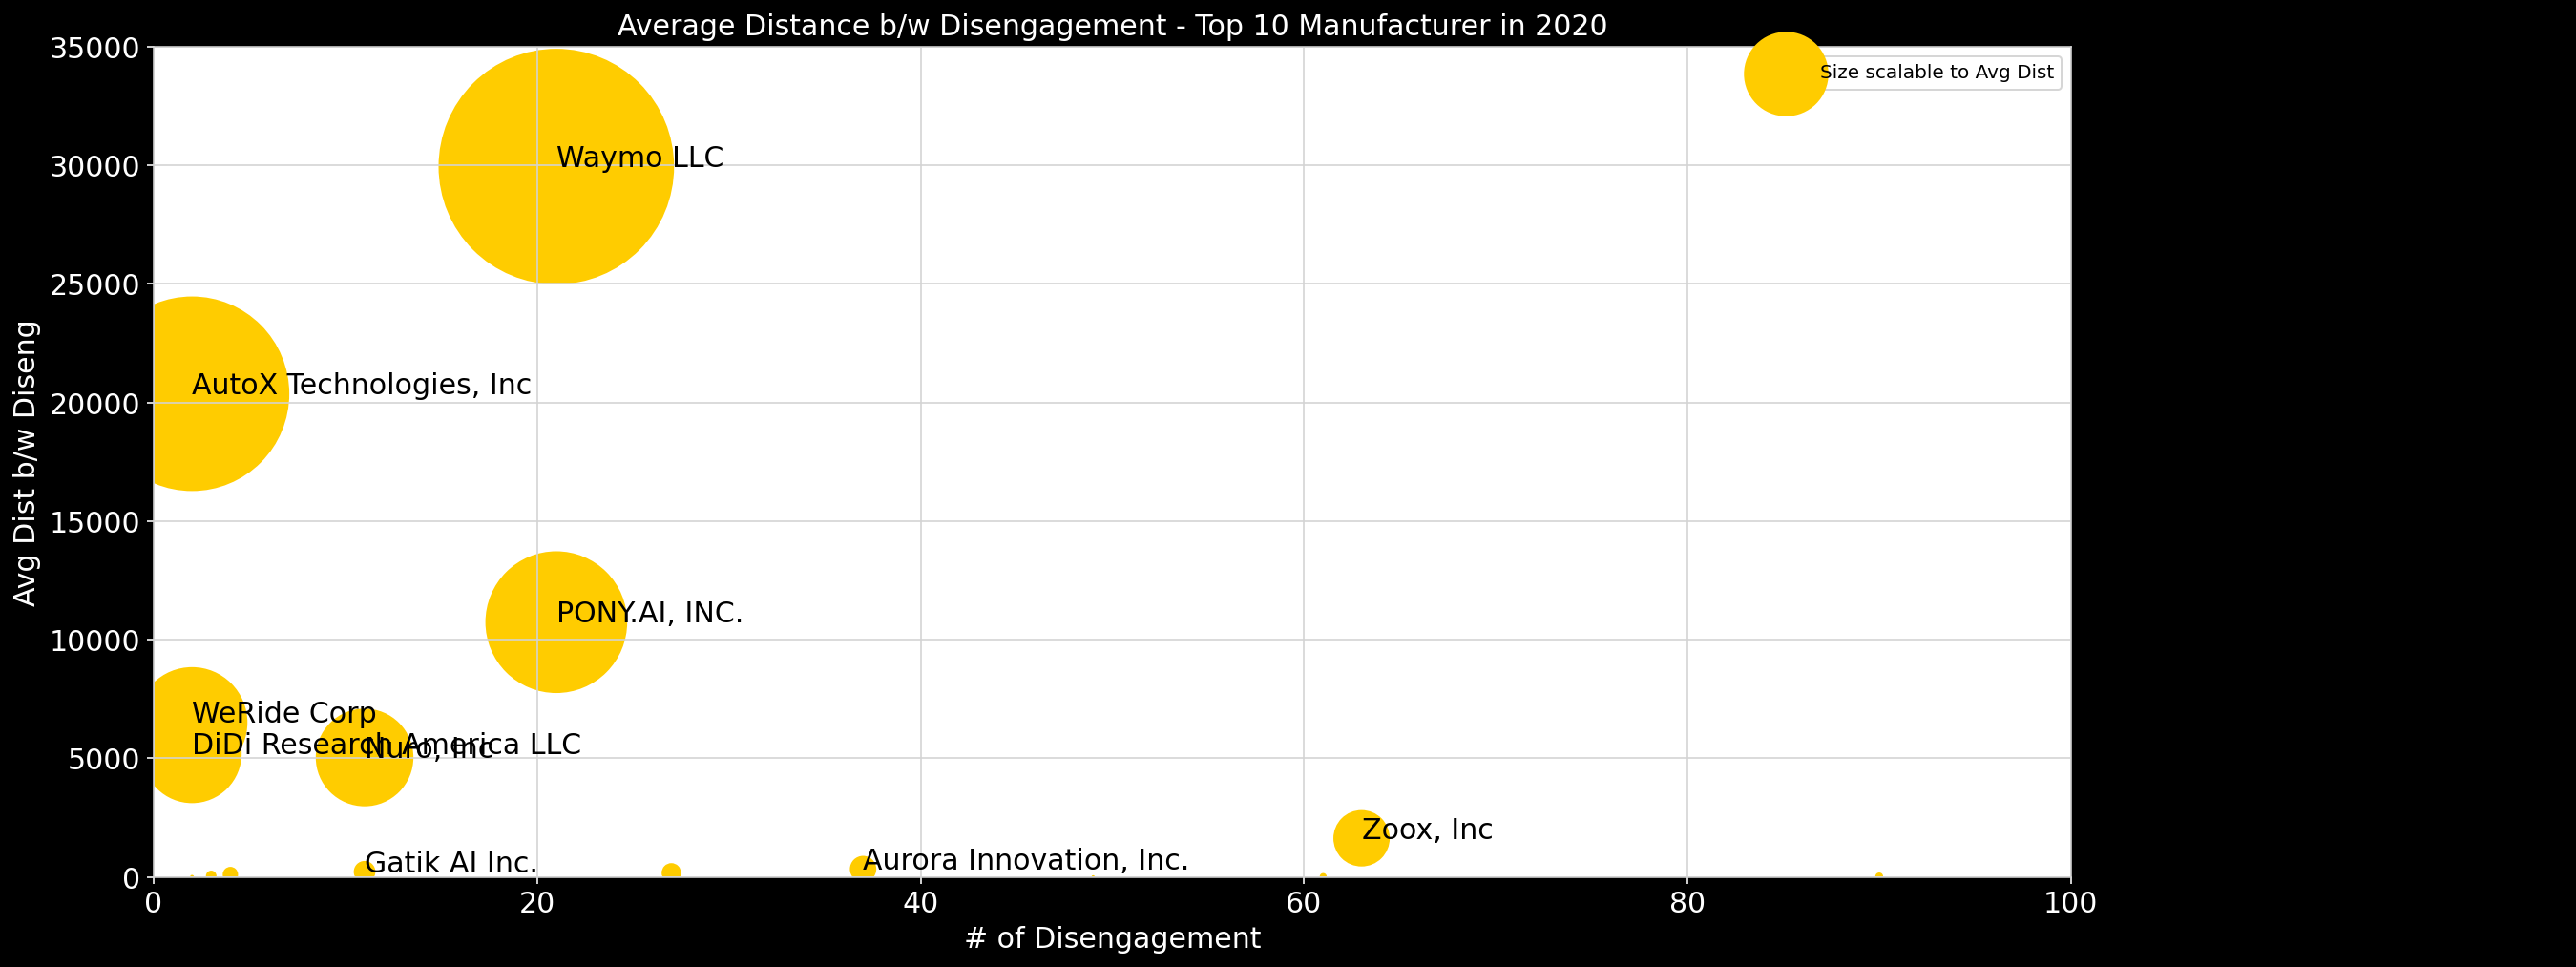

In [48]:
plt.figure(figsize=(18, 8))
plt.axis([0,100,0,35000])
plt.scatter(data['Number of Diseng'], data['Avg Dist b/w Diseng'],color="#FFCC00", 
            s=data['Avg Dist b/w Diseng'].values/2, )
for i in range(10):
  plt.text(data['Number of Diseng'][i], data['Avg Dist b/w Diseng'][i], data['Manufacturer'][i], fontsize=15)

plt.xlabel("# of Disengagement", fontsize=15, color='white')
plt.ylabel('Avg Dist b/w Diseng', fontsize=15, color='white')
#plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.legend(['Size scalable to Avg Dist'],markerscale=0.5)
plt.title("Average Distance b/w Disengagement - Top 10 Manufacturer in 2020", fontsize=15, color='white')
plt.grid()
plt.show()

- By showing the top 10 average distance per disengagement in 2020, we are aware that the leading companies include Waymo, AutoX and Pony AI. We notice that Baidu are no longer in the game but new players such as Didi Research and WeRide joined in this year.

- Waymo average distance per diseng has increased to almost 30K miles from last year 13K. AutoX to 20K miles from 10.6K. Pony AI to 10.7K miles from 6.5. WeRide to 6.5K miles from 152. Significant increase of auto driving tests from previous year.

- In theory, the more disengagment (more sustainable) and higher average distance (more reliable per test) the better. Looking forward to new players such as WeRide to continue to gain experience in 2021.